# US YOUTUBE TRENDING

## INRODUCTION

Youtube merupakan video platform yang paling populer dan paling sering digunakan pada saat ini. Youtube juga memiliki daftar video trending yang terus diperbaharui

## LATAR BELAKANG MASALAH

Client yang merupakan seorang youtuber membutuhkan bantuan untuk mengetahui faktor apa saja yang dapat mempengaruhi algoritma youtube trending, informasi ini sangat membantu bagi client untuk dapat membuat video youtubenya menjadi trending.

Sebagai seorang Data Analis kita dihadapkan untuk menjawab pertanyaan berikut :


- Apakah terdapat korelasi antar variabel yang membuat video trending ?
- Apakah terdapat pengaruh jumlah likes terhadap jumlah views ?
- Apakah terdapat pengaruh jumlah komentar terhadap jumlah views ?
- Berapa lama yang dibutuhkan video yang baru dipublish untuk menjadi trending ?
- Channel Youtube mana yang paling banyak mempunyai video yang trending ?
- Kategori video mana yang mempunyai video trending paling banyak ?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


## DATA

### Input JSON Dataset

In [2]:
df_json = pd.read_json('US_category_id.json')
df_json.head(3)

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [7]:
df_json.describe()

,kind,etag,items
count,32,32,32
unique,1,1,32
top,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
freq,32,32,1


In [3]:
## Mengakses kolom item pada dataset US Category

df_json.loc[:,['items']].head(3)

,items
0,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [3]:
## 
list_id = []
list_title = []

for i in df_json.loc[:,'items']:
    list_id.append(i['id'])
    list_title.append(i['snippet']['title'])

# Membuat data frame
df_categori = pd.DataFrame({'category_id':list_id, 'category':list_title})

# Rubah 'category_id' ke tipe int64 agar cocok dengan 'category_id' pada data csv untuk digabungkan ke dalam kolom utama
df_categori['category_id'] = df_categori['category_id'].astype(np.int64)

df_categori.head(3)

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music


Total terdapat 32 kategori video yang ada di youtube

In [4]:
# Cek tipe data
df_categori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  32 non-null     int64 
 1   category     32 non-null     object
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


### Input CVS Dataset

Dataset ini berisi 16 kolom diantaranya :

* `video_id` : ID unik dari setiap video.
* `trending_date`: tanggal trending.
* `title` : judul video.
* `channel_title` : nama channel.
* `category_id` : ID unik di setiap kategori video.
* `publish_time` : tanggal video publish.
* `tags` : video tags.
* `views` : jumlah view.
* `likes` : jumlah like.
* `dislikes` : videos dislike count.
* `comment_count` : jumlah komentar.
* `thumbnail_link` : videos thumbnail link.
* `comments_disabled` : berisi boolean apakah bagian komentar dinonaktifkan atau tidak.
* `ratings_disabled` : berisi boolean apakah bagian rating dinonaktifkan atau tidak.
* `video_error_or_removed` : mengandung boolean apakah video error atau dihapus.
* `description` : deskripsi video.


In [5]:
df_csv=pd.read_csv('USvideos.csv')
df_csv.head(3)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [6]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

### Menggabungkan 2 Dataset pada Kolom Categori

In [6]:
# Menggabungkan 2 data menggunakan kolom category_id 
df1 = pd.merge(df_csv, df_categori, how='inner', left_on='category_id', right_on='category_id')

# Dataset utama
df1.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs


### Mengatur Tanggal Trending Date dan Publish Time

Publish Time 

In [7]:
# Merubah tipe data pada kolom publish_time menjadi datetime format dan membagi menjadi dua bagian yaitu tanggal dan waktu
publish_time = pd.to_datetime(df1['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df1['publish_date'] = publish_time.dt.date
df1['publish_time'] = publish_time.dt.time

Trending Date

In [8]:
# Merubah tipe data pada kolom trending_date menjadi datetime format
df1['trending_date'] = pd.to_datetime(df1['trending_date'], format='%y.%d.%m').dt.date

Day To Trending

In [9]:
# Mencari selisih dari publish date dikurangi trending date
df1['dayToTrending'] = df1['trending_date'] - df1['publish_date']

# Mengubah tipe data ke int
df1['dayToTrending'] = df1['dayToTrending'].dt.days
df1['dayToTrending'].info()

<class 'pandas.core.series.Series'>
Int64Index: 40949 entries, 0 to 40948
Series name: dayToTrending
Non-Null Count  Dtype
--------------  -----
40949 non-null  int64
dtypes: int64(1)
memory usage: 639.8 KB


In [10]:
df1.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,publish_date,dayToTrending
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,2017-11-13,1


## CLEANING DATA

### Mencari Null Data

In [11]:
df1.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category                    0
publish_date                0
dayToTrending               0
dtype: int64

In [12]:
# persentase missing value di tiap kolom
df1.isna().sum()/df1.shape[0]*100

video_id                  0.000000
trending_date             0.000000
title                     0.000000
channel_title             0.000000
category_id               0.000000
publish_time              0.000000
tags                      0.000000
views                     0.000000
likes                     0.000000
dislikes                  0.000000
comment_count             0.000000
thumbnail_link            0.000000
comments_disabled         0.000000
ratings_disabled          0.000000
video_error_or_removed    0.000000
description               1.391975
category                  0.000000
publish_date              0.000000
dayToTrending             0.000000
dtype: float64

Terdapat Missing Value pada kolom description, dengan presentase sebesar 1,4% sebanyak 570 baris

Jadi untuk melakukan pembersihan data, dan untuk menghilangkan nilai null tersebut, saya menempatkan string kosong sebagai pengganti setiap nilai null di kolom `description`

In [13]:
df1["description"] = df1["description"].fillna(value="")

In [14]:
df1.isna().sum()/df1.shape[0]*100

video_id                  0.0
trending_date             0.0
title                     0.0
channel_title             0.0
category_id               0.0
publish_time              0.0
tags                      0.0
views                     0.0
likes                     0.0
dislikes                  0.0
comment_count             0.0
thumbnail_link            0.0
comments_disabled         0.0
ratings_disabled          0.0
video_error_or_removed    0.0
description               0.0
category                  0.0
publish_date              0.0
dayToTrending             0.0
dtype: float64

### Mencari Data Duplikat

In [15]:
# Info dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

- Sebelum proses menghilangkan duplikasi data dataframe df1 memiliki jumlah baris sebanyak 40949 baris

In [16]:
# Mencari data duplikat
df1[df1.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,publish_date,dayToTrending
2864,jzLlsbdrwQk,2018-05-15,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,15:00:57,"buzzfeed|""worth it""|""cheap vs. expensive""|""ste...",3081033,60379,6857,7796,https://i.ytimg.com/vi/jzLlsbdrwQk/default.jpg,False,False,False,“Who is Lennox and why is he so special?”Credi...,People & Blogs,2018-05-13,2
2865,UQkBcHLZOqU,2018-05-15,Wearing Fashion Nova Outfits For A Week,Safiya Nygaard,22,22:36:56,"wearing fashion nova outfits for a week|""fashi...",4106029,205285,2180,11217,https://i.ytimg.com/vi/UQkBcHLZOqU/default.jpg,False,False,False,I've been seeing this mysterious hashtag #Nova...,People & Blogs,2018-05-11,4
11585,t4pRQ0jn23Q,2018-05-15,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Complex,24,14:00:03,"sneakerhead|""complex""|""complex originals""|""sne...",1199587,49709,2380,7261,https://i.ytimg.com/vi/t4pRQ0jn23Q/default.jpg,False,False,False,YoungBoy Never Broke Again goes Sneaker Shoppi...,Entertainment,2018-05-14,1
11586,j4KvrAUjn6c,2018-05-15,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,18:03:56,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",3906727,77378,12160,15874,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...,Entertainment,2018-05-13,2
11587,xhs8tf1v__w,2018-05-15,Terry Crews Answers the Web's Most Searched Qu...,WIRED,24,16:00:29,"autocomplete|""deadpool 2""|""google autocomplete...",343967,16988,132,1308,https://i.ytimg.com/vi/xhs8tf1v__w/default.jpg,False,False,False,Terry Crews takes the WIRED Autocomplete Inter...,Entertainment,2018-05-14,1
11588,1RZYOeQeIXE,2018-05-15,Sarah Paulson Gets Scared During '5 Second Rule',TheEllenShow,24,13:00:00,"ellen|""ellen degeneres""|""the ellen show""|""seas...",704786,19880,248,669,https://i.ytimg.com/vi/1RZYOeQeIXE/default.jpg,False,False,False,Sarah Paulson agreed to play a friendly game o...,Entertainment,2018-05-14,1
11589,WF82ABLw8s4,2018-05-15,Gabby Barrett Sings I Have Nothing by Whitney ...,American Idol,24,02:23:01,"ABC|""americanidol""|""idol""|""american idol""|""rya...",735031,11734,1468,1870,https://i.ytimg.com/vi/WF82ABLw8s4/default.jpg,False,False,False,Gabby Barrett sings I Have Nothing by Whitney ...,Entertainment,2018-05-14,1
11590,HrQNdClwMs4,2018-05-15,DIY GIANT McDONALDS HASH BROWN 🍟 - VERSUS,HellthyJunkFood,24,13:00:01,"mcdonalds hashbrown|""mcdonalds""|""hash brown""|""...",1957964,25829,2643,3698,https://i.ytimg.com/vi/HrQNdClwMs4/default.jpg,False,False,False,SUBSCRIBE HERE ➡️ https://goo.gl/CitGia2ND CHA...,Entertainment,2018-05-13,2
11591,4oqvNR1o3Zo,2018-05-15,24 HOUR BOX FORT PRISON ESCAPE ROOM!! 📦🚔 Diggi...,Papa Jake,24,16:42:33,"box fort|""fort""|""kids""|""funny""|""fun""|""no swear...",1030616,20251,3290,3567,https://i.ytimg.com/vi/4oqvNR1o3Zo/default.jpg,False,False,False,In Todays 24 hour Box Fort video papa Jake bui...,Entertainment,2018-05-13,2
11592,oRexsyztGS0,2018-05-15,Exciting iPhone 11 Leaks & Round Apple Watch!,EverythingApplePro,24,18:29:09,"iPhone 11|""iphone 11 leaks""|""2018 iphone""|""iph...",963996,20323,1108,3323,https://i.ytimg.com/vi/oRexsyztGS0/default.jpg,False,False,False,"iPhone 11 Leaks Are Ramping Up, Latest Feature...",Entertainment,2018-05-13,2


Berdasar hasil pengecekan terdapat sebesar 48 baris data duplikat, data duplikat ini dapat mempengaruhi hasil analisis maka dari itu sebaiknya data tersebut lebih baik dihapus.

In [17]:
# Menghapus duplikasi data
df1 = df1.drop_duplicates().reset_index().drop(columns={'index'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40901 entries, 0 to 40900
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or_removed  40901 non-null  bool  
 15  de

In [18]:
df1[df1.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,publish_date,dayToTrending


- Terlihat bahwa setelah proses penghapusan duplikasi data, baris yang dimiliki dataframe df1 semula terdapat 40949 baris menjadi 40901 baris
- Terdapat pengurangan sebesar 48 baris setelah dilakukan penghapusan duplikasi data

### Outlier Data

Outliers adalah data yang menyimpang terlalu jauh dari data yang lainnya dalam suatu rangkaian data. Adanya data outliers ini akan membuat anlisis menjadi bias

In [19]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,40901.0,1.997059e+01,7.569362e+00,1.0,17.0,24.0,25.0,43.0
views,40901.0,2.360678e+06,7.397719e+06,549.0,241972.0,681064.0,1821926.0,225211923.0
likes,40901.0,7.427173e+04,2.289999e+05,0.0,5416.0,18069.0,55338.0,5613827.0
dislikes,40901.0,3.711722e+03,2.904624e+04,0.0,202.0,630.0,1936.0,1674420.0
comment_count,40901.0,8.448567e+03,3.745139e+04,0.0,613.0,1855.0,5752.0,1361580.0
dayToTrending,40901.0,1.682685e+01,1.460992e+02,0.0,3.0,5.0,9.0,4215.0


In [20]:
# Mencari Q1, Q2, dan IQR
Q1 = df1['views'].describe()['25%']
Q3 = df1['views'].describe()['75%']
IQR = Q3-Q1

outlier_index = df1[(df1['views']<Q1-(1.5*IQR)) | (df1['views']>Q3+(1.5*IQR))].index
not_outlier_index = df1[(df1['views']>Q1-(1.5*IQR)) | (df1['views']<Q3+(1.5*IQR))].index
df1.loc[outlier_index]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,publish_date,dayToTrending
364,SxAp27sFaIM,2017-12-08,Lil Uzi Vert - The Way Life Goes Remix (Feat. ...,LIL UZI VERT,22,22:42:37,"Lil|""Uzi""|""Vert""|""Lil Uzi Vert""|""Uzi Vert""|""Li...",4851310,182758,11277,29512,https://i.ytimg.com/vi/SxAp27sFaIM/default.jpg,False,False,False,Lil Uzi Vert - The Way Life Goes Remix (Feat. ...,People & Blogs,2017-12-04,4
388,SxAp27sFaIM,2017-12-09,Lil Uzi Vert - The Way Life Goes Remix (Feat. ...,LIL UZI VERT,22,22:42:37,"Lil|""Uzi""|""Vert""|""Lil Uzi Vert""|""Uzi Vert""|""Li...",6276242,209694,12514,31540,https://i.ytimg.com/vi/SxAp27sFaIM/default.jpg,False,False,False,Lil Uzi Vert - The Way Life Goes Remix (Feat. ...,People & Blogs,2017-12-04,5
418,SxAp27sFaIM,2017-12-10,Lil Uzi Vert - The Way Life Goes Remix (Feat. ...,LIL UZI VERT,22,22:42:37,"Lil|""Uzi""|""Vert""|""Lil Uzi Vert""|""Uzi Vert""|""Li...",7968482,232613,13681,32352,https://i.ytimg.com/vi/SxAp27sFaIM/default.jpg,False,False,False,Lil Uzi Vert - The Way Life Goes Remix (Feat. ...,People & Blogs,2017-12-04,6
445,SxAp27sFaIM,2017-12-11,Lil Uzi Vert - The Way Life Goes Remix (Feat. ...,LIL UZI VERT,22,22:42:37,"Lil|""Uzi""|""Vert""|""Lil Uzi Vert""|""Uzi Vert""|""Li...",9235248,248647,14575,33036,https://i.ytimg.com/vi/SxAp27sFaIM/default.jpg,False,False,False,Lil Uzi Vert - The Way Life Goes Remix (Feat. ...,People & Blogs,2017-12-04,7
474,SxAp27sFaIM,2017-12-12,Lil Uzi Vert - The Way Life Goes Remix (Feat. ...,LIL UZI VERT,22,22:42:37,"Lil|""Uzi""|""Vert""|""Lil Uzi Vert""|""Uzi Vert""|""Li...",10403477,261095,15386,33906,https://i.ytimg.com/vi/SxAp27sFaIM/default.jpg,False,False,False,Lil Uzi Vert - The Way Life Goes Remix (Feat. ...,People & Blogs,2017-12-04,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40814,oWjxSkJpxFU,2018-01-29,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,29,18:30:01,"logan paul vlog|""logan paul""|""logan""|""paul""|""l...",22387656,1919981,461659,625002,https://i.ytimg.com/vi/oWjxSkJpxFU/default.jpg,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Nonprofits & Activism,2018-01-24,5
40815,oWjxSkJpxFU,2018-01-30,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,29,18:30:01,"logan paul vlog|""logan paul""|""logan""|""paul""|""l...",23164093,1949284,476337,636100,https://i.ytimg.com/vi/oWjxSkJpxFU/default.jpg,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Nonprofits & Activism,2018-01-24,6
40816,oWjxSkJpxFU,2018-01-31,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,29,18:30:01,"logan paul vlog|""logan paul""|""logan""|""paul""|""l...",23742391,1970266,487820,647524,https://i.ytimg.com/vi/oWjxSkJpxFU/default.jpg,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Nonprofits & Activism,2018-01-24,7
40817,oWjxSkJpxFU,2018-02-01,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,29,18:30:01,"logan paul vlog|""logan paul""|""logan""|""paul""|""l...",24286474,1988746,497847,658130,https://i.ytimg.com/vi/oWjxSkJpxFU/default.jpg,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Nonprofits & Activism,2018-01-24,8


<AxesSubplot: xlabel='dayToTrending'>

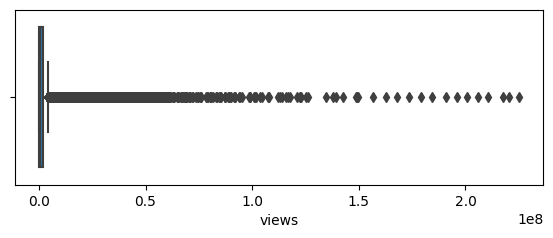

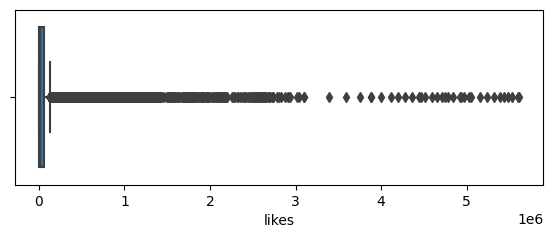

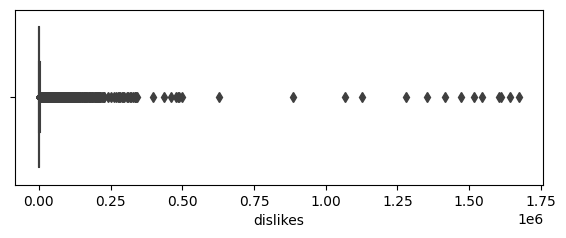

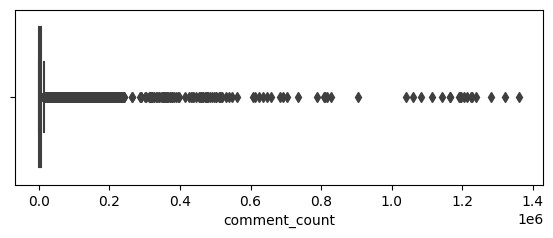

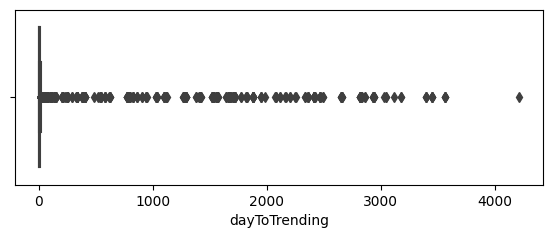

In [21]:
# Boxplot views
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.boxplot(x=df1['views'])

# Boxplot likes
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.boxplot(x=df1['likes'])

# Boxplot dislikes
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.boxplot(x=df1['dislikes'])

# Boxplot comment_count
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.boxplot(x=df1['comment_count'])

# Boxplot dayToTrending
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.boxplot(x=df1['dayToTrending'])

Terdapat outlier data sebanyak 4497 baris.

Pada data ini outlier terjadi karena varian pada data data tersebut terlalu besar. Oleh karena itu outlier pada data ini tidak akan dihapus dikarenakan jika dihapus akan menyebabkan terjadinya miss interpretasi nantinya. 

In [22]:
# Export data yang sudah bersih ke csv
df1.to_csv('Youtube_Trending.csv', index=False)

## DATA ANALYSIS

### Korelasi antar variabel

Sebelum menghitung korelasi antar variabel, ada beberapa variabel yang harus diubah ke dalam bentuk numerikal seperti judul video, dan tag.
Untuk mengubah ke dalam numerikal, data tersebut akan dicari panjang perkata.

In [23]:
# Mencari panjang kata dari judul
df1["title_length"] = df1["title"].apply(lambda x: len(x))

# Mencari panjang dari tags
df1["tags_length"] = df1["tags"].apply(lambda x: len(x))

df1.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,publish_date,dayToTrending,title_length,tags_length
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,2017-11-13,1,34,15
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,...,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,2017-04-21,207,20,25
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,...,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,2017-11-11,3,75,534


In [24]:
# Checking the correlation
df1_corr = df1[['views', 'likes', 'dislikes', 'comment_count', 'dayToTrending','title_length', 'tags_length']].corr()[['views']]
df1_corr

,views
views,1.000000
likes,0.849179
dislikes,0.472216
comment_count,0.617657
dayToTrending,-0.014429
title_length,-0.035569
tags_length,-0.016070


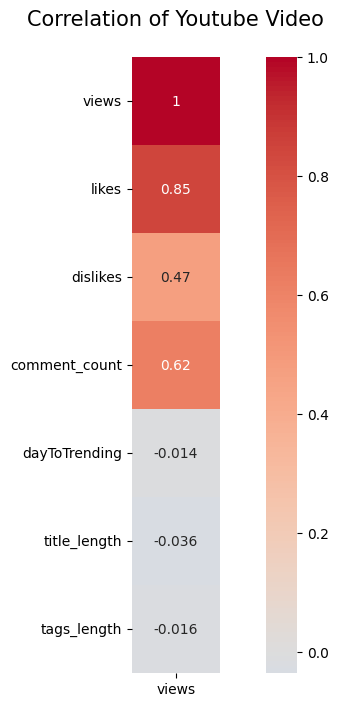

In [25]:
# Plotting ke Heatmap
plt.figure(figsize=(12,8))
plt.title('Correlation of Youtube Video\n', fontsize=15)

sns.heatmap(data=df1_corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.xticks(size=10)

plt.show()

Dari Visualisasi diatas dapat diketahui :
- 'likes' mempunyai korelasi positif paling kuat dengan 'views' dengan nilai korelasi 0.85
- 'dislikes' mempunyai korelasi positif dengan 'views' dengan nilai korelasi 0.47
- 'comment_count' mempunyai korelasi positif yang kuat dengan 'views' dengan nilai korelasi 0.62
- 'dayToTrending', 'title_length' 'tags_length' dengan korelasi negatif yang rendah pada 'views' nilai korelasi masing-masing -0.014, 0.036, 0.016

### Apakah terdapat hubungan antara like terhadap views

In [26]:
from scipy.stats import normaltest

# Cek distribusi data kolom 'views' 
stats, pvalue=normaltest (df1['views'])
if pvalue<=0.05:
    print(f'data tidak terdistribusi normal, pvalue = {pvalue}')       #Ha
else: 
    print(f'data terdistribusi normal, pvalue = {pvalue}')             #Ho 

data tidak terdistribusi normal, pvalue = 0.0


In [27]:
from scipy.stats import normaltest

# Cek distribusi data kolom 'likes' 
stats, pvalue=normaltest (df1['likes'])
if pvalue<=0.05:
     print(f'data tidak terdistribusi normal, pvalue = {pvalue}')       #Ha
else: 
    print(f'data terdistribusi normal, pvalue = {pvalue}')              #Ho 

data tidak terdistribusi normal, pvalue = 0.0


In [28]:
# Hipotesis Test
# Apakah terdapat pengaruh jumlah likes terhadap jumlah views ?
# Dikarenakan data tidak terdistribusi normal, maka saya memakai mannwhitney test.
from scipy.stats import mannwhitneyu

stats,pvalue=mannwhitneyu(df1['likes'], df1['views'])
if pvalue <= 0.05:
    # Ha --> 
    print(f'Menolak Ho, pvalue = {pvalue}', '\nTerdapat pengaruh jumlah likes terhadap views')
else:
    # Ho --> 
    print(f'Failed to Reject Ho, pvalue = {pvalue}', '\nTidak Terdapat pengaruh jumlah likes terhadap views')

Menolak Ho, pvalue = 0.0 
Terdapat pengaruh jumlah likes terhadap views


- Dari hasil uji diatas dapat disimpulkan bahwa jumlah likes di suatu video dapat mempengaruhi jumlah views hingga video menjadi trending

### Apakah terdapat hubungan antara comment Count terhadap views

- Hipotesis Test
- Apakah terdapat pengaruh jumlah likes erhadap jumlah views ?
- Diasumsikan data tidak terdistribusi normal, maka saya memakai mannwhitney test.

In [36]:
from scipy.stats import mannwhitneyu

stats,pvalue=mannwhitneyu(df1['comment_count'], df1['views'])
if pvalue <= 0.05:
    # Ha --> 
    print(f'Menolak Ho, pvalue = {pvalue}', '\nTerdapat pengaruh jumlah komentar terhadap views')
else:
    # Ho --> 
    print(f'Failed to Reject Ho, pvalue = {pvalue}', '\nTidak Terdapat pengaruh jumlah komentar terhadap views')

Menolak Ho, pvalue = 0.0 
Terdapat pengaruh jumlah komentar terhadap views


- Dari hasil uji diatas dapat disimpulkan bahwa jumlah komentar di suatu video dapat mempengaruhi jumlah views hingga video menjadi trending

### Jarak atau lama video untuk menjadi trending

In [29]:
df1.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,publish_date,dayToTrending,title_length,tags_length
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,2017-11-13,1,34,15
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,...,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,2017-04-21,207,20,25
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,...,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,2017-11-11,3,75,534


In [32]:
# membuat tabel 
df2 = df1[['dayToTrending']].rename(columns={'dayToTrending':'number of days'})
df2

,number of days
0,1
1,207
2,3
3,3
4,3
...,...
40896,23
40897,24
40898,25
40899,26


Karena data pada kolom 'number of days' terlalu banyak, maka akan dikelompokkan menjadi 7 bagian
- <7 = kurang dari 7 hari
- 7-13 = antara 7 sampai 13 hari
- 14-49 = antara 14 sampai 49 hari
- 50-99 = antara 50 sampai 99 hari
- 100-499 = antara 100 sampai 499 hari
- 500-999 = antara 500 sampai 999 hari
- .>1000 = lebih dari 1000 hari

In [33]:
# Mengelompokkan hari
df2['day_class_tren'] = pd.cut(df2['number of days'], [-1, 7, 14, 49, 99, 499, 999, 4500], 
       labels = ['<7', '7-13', '14-49', '50-99', '100-499', '500-999','>1000'])
df2.head()

,number of days,day_class_tren
0,1,<7
1,207,100-499
2,3,<7
3,3,<7
4,3,<7


In [34]:
# Menghitung nilai dari kolom day_class_tren
day = df2['day_class_tren'].value_counts().rename_axis('day_class').reset_index(name='day_class_counts').sort_values(by='day_class')
day

,day_class,day_class_counts
0,<7,28308
1,7-13,9222
2,14-49,3055
6,50-99,24
4,100-499,70
5,500-999,40
3,>1000,182


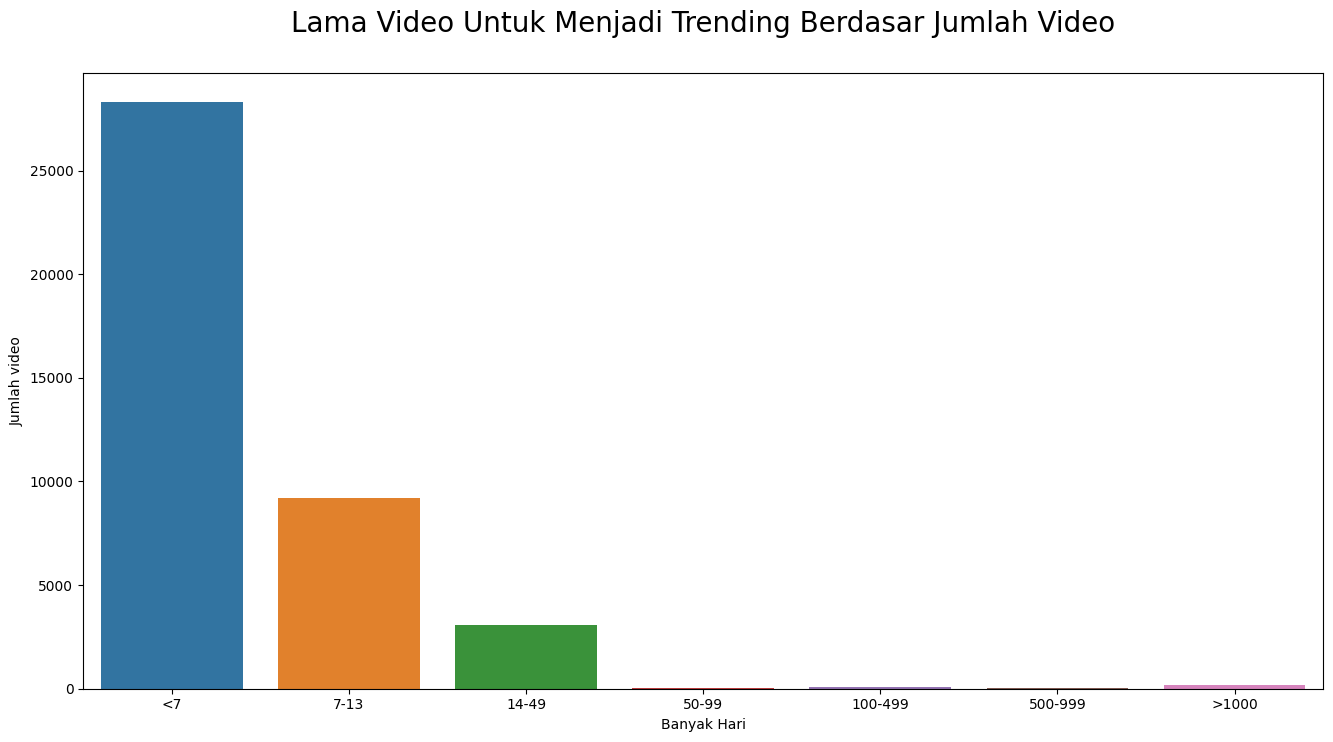

In [35]:
# Visualisasi data menggunakan barplot

plt.figure(figsize=(16,8))

plt.title('Lama Video Untuk Menjadi Trending Berdasar Jumlah Video\n', size=20)
sns.barplot(data=day, y='day_class_counts', x='day_class')
plt.xlabel("Banyak Hari")
plt.ylabel("Jumlah video")
plt.show()

Dari data diatas dapat disimpulkan bahwa lama video untuk menjadi trending paling banyak kurang dari 7 hari dihitung dari dipublishnya video tersebut, dengan jumlah video lebih dari 25000 video. Tapi ada juga video menjadi trending lebih dari 1000 hari setelah video tersebut dipublish.

### Channel  Youtube yang mempunyai banyak video trending

Dikarenakan data dari channel youtube terlalu banyak, maka akan ditampilkan sebanyak 20 channel teratas yang memilki jumlah video trending terbanyak

Text(0, 0.5, 'Channel Youtube')

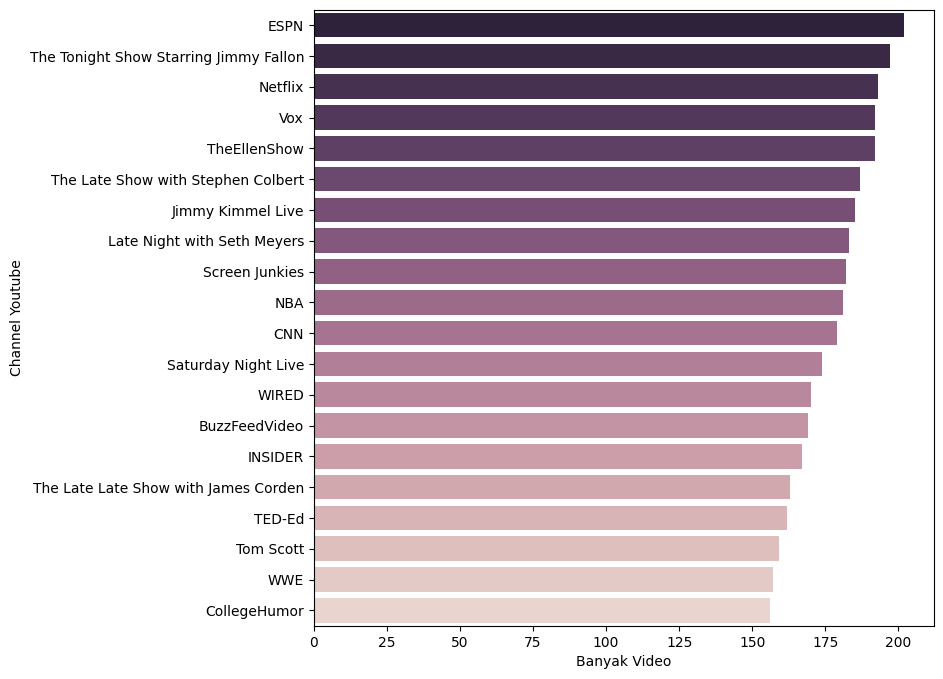

In [23]:
# Mencari jumlah video trending dari masing2 channel
cdf = df1.groupby("channel_title").size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)

# Visualisasi menggunakan Barplot
plt.subplots(figsize=(8,8))
sns.barplot(x="video_count", y="channel_title", data=cdf,palette=sns.cubehelix_palette(n_colors=20, reverse=True))
plt.xlabel("Banyak Video")
plt.ylabel("Channel Youtube")

In [36]:
cdf

,channel_title,video_count
555,ESPN,202
1785,The Tonight Show Starring Jimmy Fallon,197
1271,Netflix,193
1943,Vox,192
1804,TheEllenShow,192
1753,The Late Show with Stephen Colbert,187
889,Jimmy Kimmel Live,185
1009,Late Night with Seth Meyers,183
1556,Screen Junkies,182
1239,NBA,181


Dari visualisasi diatas dapat disimpulkan bahwa :
1. Channel Youtube yang mempunyai video trending terbanyak adalah ESPN dengan jumlah video mencapai 200 lebih
2. Channel Youtube yang mempunyai video trending terbanyak ke 2 adalah The Tonight Show Starring Jimmy Fallon
3. Dari 20 data Channel Youtube diatas Channel yang mempunyai paling sedikit video trending adalah CollegeHumor	

### Kategori video yang mempunyai video trending paling banyak

In [37]:
# membuat tabel data dari video kategori

cdf = df1.groupby('category')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'number of videos'})
cdf

,category,number of videos
0,Entertainment,9944
1,Music,6467
2,Howto & Style,4142
3,Comedy,3453
4,People & Blogs,3208
5,News & Politics,2485
6,Science & Technology,2397
7,Film & Animation,2343
8,Sports,2172
9,Education,1655


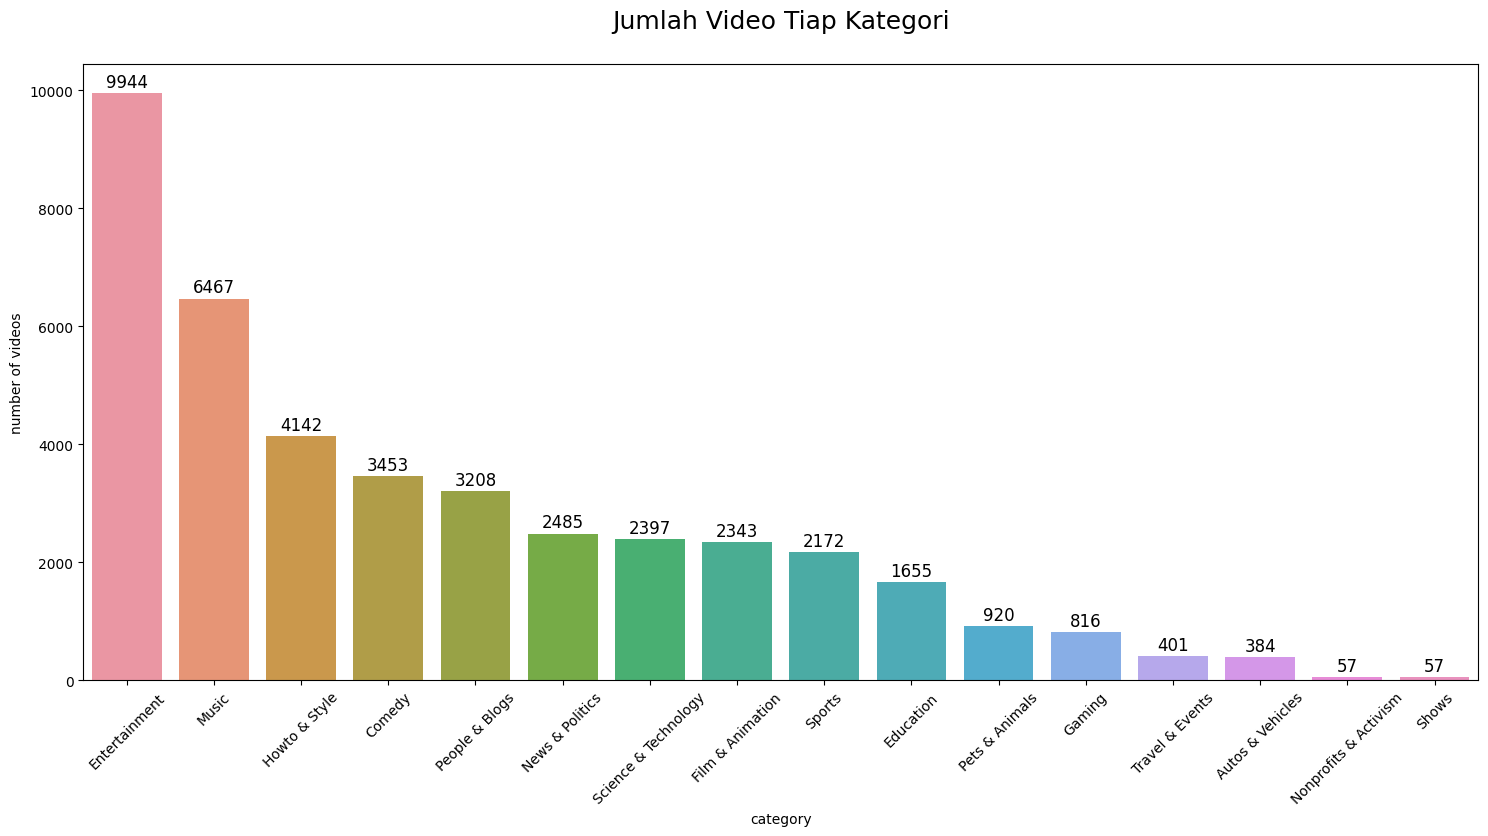

In [119]:
# Defining the plot size
plt.figure(figsize=(18, 8))
plt.title('Jumlah Video Tiap Kategori\n', size=18)


plots = sns.barplot(data=cdf, y='number of videos', x='category')

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation = 45)

plt.show()

Dari sini dapat disimpulkan bahwa :
- Kategori Entertainment merupakan kategori yang paling banyak terdapat video trending dengan jumlah 9944 video, kemudian disusul kategori Music dengan jumlah video mencapai 6467 video dan ketiga kategori How to & Style dengan jumlah video 4142 video.
- Dan Kategori yang terdapat video trending paling sedikit adalah Nonprofits & Activism dan Shows dengan masing-masing terdapat 57 video. 